# Plots of Layout PS

A collection of plots of power spectra from the scripts in this directory.

## The Idea

The idea of this notebook is to understand how much wedge-mitigation can be expected to be achieved by a next-generation array of dipoles, using just array layout. The assumptions made in these calculations:

* Flat array of dipoles
* Dipoles are circular and have diameter of $d=1.5$m
* All dipoles have identical Gaussian primary beams with achromatic width $\sigma = 84{\rm m} / d$.
* The Gaussian beam is Gaussian in $(l,m)$ space.
* Observations are "snapshot", i.e. the sky rotation is expected to be negligible.
* The sky/signal consists solely of point-sources, with a statistically uniform distribution over the sky (in angular co-ordinates). 
* Sources follow a power-law source-count relation, with a maximum of 1Jy, and a minimum given by the flux density above which 95% of the second moment of flux lies (i.e. $\int S^2 n(S) dS$). This is a large number of sources (to be worked out...)
* There are no calibration errors, and each antenna position is know precisely.
* Gridding of visibilities is performed via a weighted sum of measured visibilities at grid nodes, with the weight kernel given by the Fourier transform of the beam.
* Layouts currently investigated can be seen below, and consist of regular- and log-spaced polar grids, and randomly filled circles with a density gradient of zero and one. Each kind of layout is tested for 256, 1e3 and 1e4 antennas (approximately). 


**Implementation Details**
* Gridding:
    * Gridding is done directly onto a polar grid, which alleviates any biases from circular averaging with square bins, also allowing for simple log-space bins in $u$. 
    * Gridding is made fast by using a KD-tree to determine close-enough visibilities that should be weighted onto the current grid-point.
* Visibilities:
    * The visibility calculation is done in C, but is not smart: every source, frequency and baseline is summed over.
    
**Difficulties**
* Performance:
    * At current speeds and settings (~6000 sources, 32 frequencies), we expect 1000 antennas to take 4hrs and 1e5 antennas to take 400 hrs to run.
    * Bottleneck by far is the computation of visibilities from point-sources.
* Layouts:
    * Regular/Log spokes layouts need to have a lot of spokes to work in the high-$N$ cases (otherwise they just don't fit). This can be done, of course, but then to compare them to the small-$N$ cases requires those to also have lots of spokes, which means the high-density spokes cases can't really be tested in this framework. 
    * Potentially could change number of spokes with $N$. 
    
**Ideas for Improvement**
* Thermal noise: including thermal noise may enable useful comparison between layouts with different compactness.
* Increase peeling limit to 10Jy? May enable fewer sources, but not sure how reasonable this is.
* Add layouts that are not bound by a given $R_{\rm max}$ -- have arbitrarily large arrays that can be more precisely tailored (perhaps at a cost of thermal noise).
    * This would allow for crazy things like 1D arrays in the $N=10000$ case.
* Have a think about how to optimally design antenna layouts to yield given baseline layout.

### Setup

In [1]:
from pssim.plots import plot_power
from pssim import layouts
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Basic parameters (shared)

## Layouts

LEVEL=0, N=256, n=256
LEVEL=1, N=256, n=6
LEVEL=0, N=1000, n=1000
LEVEL=1, N=1000, n=46
LEVEL=2, N=1000, n=5
LEVEL=3, N=1000, n=1
LEVEL=0, N=10000, n=10000
LEVEL=1, N=10000, n=3387
LEVEL=2, N=10000, n=2010
LEVEL=3, N=10000, n=1330
LEVEL=4, N=10000, n=945
LEVEL=5, N=10000, n=683
LEVEL=6, N=10000, n=492
LEVEL=7, N=10000, n=359
LEVEL=8, N=10000, n=273
LEVEL=9, N=10000, n=215
LEVEL=10, N=10000, n=165
LEVEL=11, N=10000, n=126
LEVEL=12, N=10000, n=91
LEVEL=13, N=10000, n=74
LEVEL=14, N=10000, n=57
LEVEL=15, N=10000, n=47
LEVEL=16, N=10000, n=39
LEVEL=17, N=10000, n=28
LEVEL=18, N=10000, n=19
LEVEL=19, N=10000, n=18
LEVEL=20, N=10000, n=15
LEVEL=21, N=10000, n=11
LEVEL=22, N=10000, n=8
LEVEL=23, N=10000, n=5
LEVEL=24, N=10000, n=4
LEVEL=25, N=10000, n=3
LEVEL=26, N=10000, n=3
LEVEL=27, N=10000, n=3
LEVEL=28, N=10000, n=2
LEVEL=29, N=10000, n=2
LEVEL=30, N=10000, n=1
LEVEL=31, N=10000, n=1
LEVEL=32, N=10000, n=1
LEVEL=33, N=10000, n=1
LEVEL=0, N=256, n=256
LEVEL=1, N=256, n=8
LEVEL=0, N=1000, 

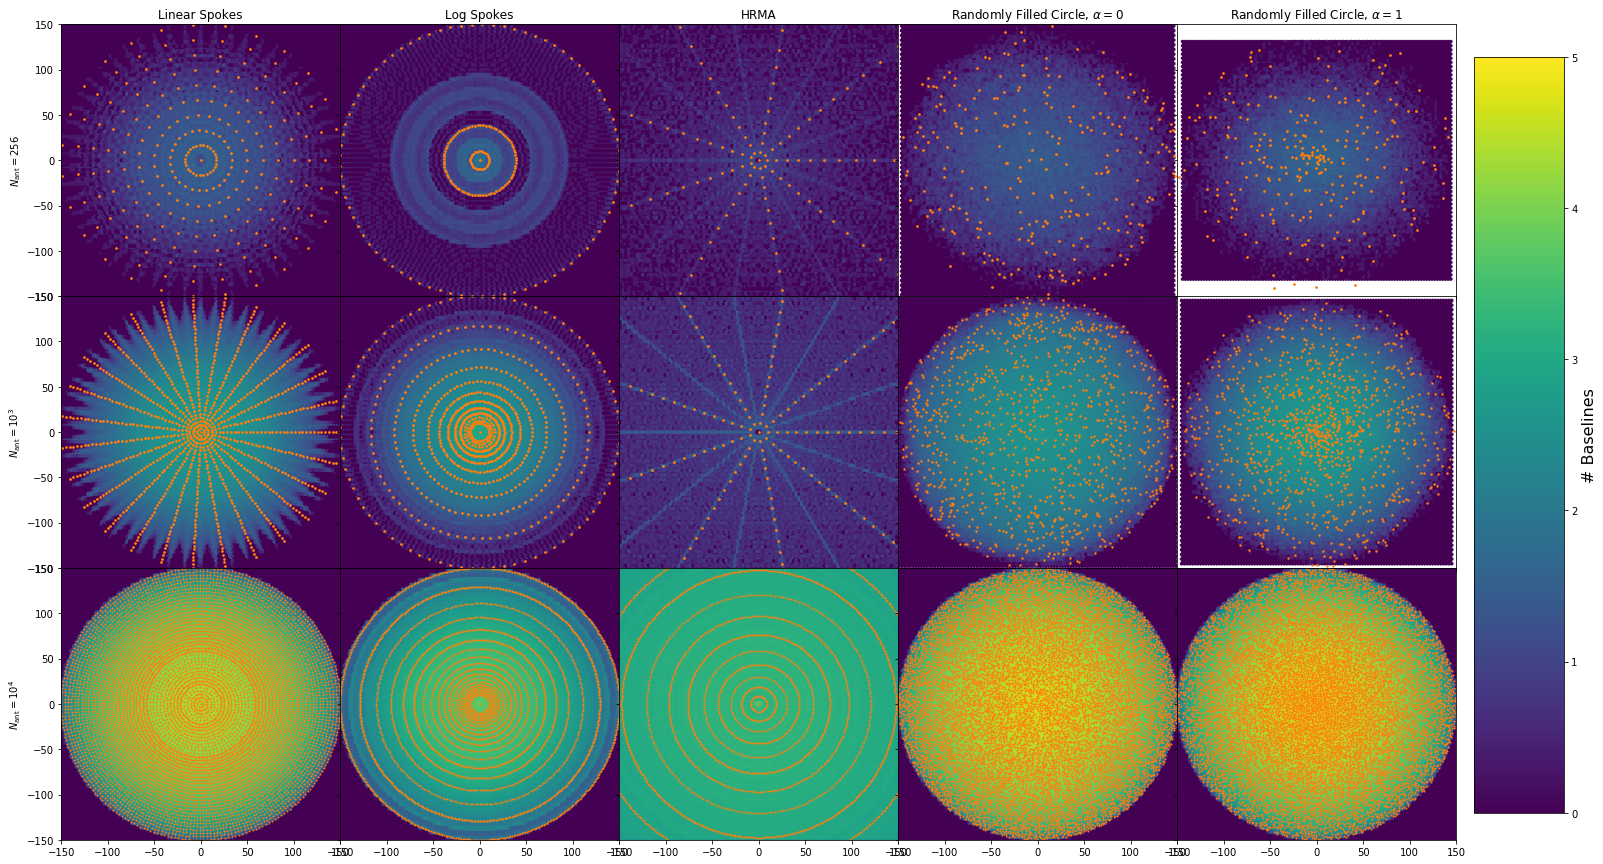

In [3]:
fig, ax = plt.subplots(
    3, 5, figsize=(25,15), sharex=True, sharey=True, 
    subplot_kw={"xlim":(-150., 150.),"ylim":(-150., 150)},
    gridspec_kw={"hspace":0, "wspace":0}
)

hexbin_kw = {"bins":'log', 'vmin':0, 'vmax':5}


bl, [x,y] = layouts.get_baselines_spokes(256, nspokes=3, umin=10, umax=150, antenna_diameter=1.5, base=3, log=False)
im = ax[0,0].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,0].scatter(x,y,s=3, color='C1')
ax[0,0].set_title("Linear Spokes")
ax[0,0].set_ylabel(r"$N_{\rm ant}=256$")

bl, [x,y] = layouts.get_baselines_spokes(1000, nspokes=3, umin=10, umax=150, antenna_diameter=1.5, base=3, log=False)
ax[1,0].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,0].scatter(x,y,s=3, color='C1')
ax[1,0].set_ylabel(r"$N_{\rm ant}=10^3$")

bl, [x,y] = layouts.get_baselines_spokes(10000, nspokes=5, umin=10, umax=150, antenna_diameter=1.5, base=3, log=False)
ax[2,0].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,0].scatter(x,y,s=1, color='C1')
ax[2,0].set_ylabel(r"$N_{\rm ant}=10^4$")

bl, [x,y] = layouts.get_baselines_spokes(256, nspokes=4, umin=10, umax=150, antenna_diameter=1.5, base=3, log=True)
ax[0,1].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,1].scatter(x,y,s=3, color='C1')
ax[0,1].set_title("Log Spokes")

bl, [x,y] = layouts.get_baselines_spokes(1000, nspokes=4, umin=10, umax=150, antenna_diameter=1.5, base=3, log=True)
ax[1,1].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,1].scatter(x,y,s=3, color='C1')

bl, [x,y] = layouts.get_baselines_spokes(10000, nspokes=9, umin=10, umax=150, antenna_diameter=1.5, base=2, log=True)
ax[2,1].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,1].scatter(x,y,s=1, color='C1')


bl, [x,y] = layouts.get_baselines_spokes(256, nspokes=2, umin=10, umax=150, antenna_diameter=1.5, base=3, log=True, large=True)
bl = bl[:, np.logical_and(np.abs(bl[0])<150, np.abs(bl[1])<150)]
ax[0,2].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,2].scatter(x,y,s=3, color='C1')
ax[0,2].set_title("HRMA")


bl, [x,y] = layouts.get_baselines_spokes(1000, nspokes=2, umin=10, umax=150, antenna_diameter=1.5, base=3, log=True, large=True)
bl = bl[:, np.logical_and(np.abs(bl[0])<150, np.abs(bl[1])<150)]
ax[1,2].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,2].scatter(x,y,s=3, color='C1')


bl, [x,y] = layouts.get_baselines_spokes(10000, nspokes=2, umin=10, umax=150, antenna_diameter=1.5, base=2, log=True, large=True)
bl = bl[:, np.logical_and(np.abs(bl[0])<150, np.abs(bl[1])<150)]
ax[2,2].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,2].scatter(x,y,s=1, color='C1')



bl, [x,y] = layouts.get_baselines_filled_circle(N=256, umax=150, alpha=0, antenna_diameter=1.5)
ax[0,3].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,3].scatter(x,y,s=3, color='C1')
ax[0,3].set_title(r"Randomly Filled Circle, $\alpha=0$")


bl, [x,y] = layouts.get_baselines_filled_circle(N=1000, umax=150, alpha=0, antenna_diameter=1.5)
ax[1,3].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,3].scatter(x,y,s=2, color='C1')


bl, [x,y] = layouts.get_baselines_filled_circle(N=10000, umax=150, alpha=0, antenna_diameter=1.5, maxlevel=50)
ax[2,3].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,3].scatter(x,y,s=1, color='C1')


bl, [x,y] = layouts.get_baselines_filled_circle(N=256, umax=150, alpha=-1, antenna_diameter=1.5)
ax[0,4].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,4].scatter(x,y,s=3, color='C1')
ax[0,4].set_title(r"Randomly Filled Circle, $\alpha=1$")

bl, [x,y] = layouts.get_baselines_filled_circle(N=1000, umax=150, alpha=-1, antenna_diameter=1.5)
ax[1,4].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,4].scatter(x,y,s=2, color='C1')

bl, [x,y] = layouts.get_baselines_filled_circle(N=10000, umax=150, alpha=-1, antenna_diameter=1.5, maxlevel=50)
ax[2,4].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,4].scatter(x,y,s=1, color='C1')

# COLORBAR
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("# Baselines", fontsize=16)


## Power Spectra

In [4]:
!ls outputs

numerical_filled_circle_0.010000_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5
numerical_filled_circle_0.01000_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5
numerical_filled_circle_0.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5
numerical_filled_circle_0.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_filled_circle_1.010000_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5
numerical_filled_circle_1.01000_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5
numerical_filled_circle_1.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5
numerical_filled_circle_1.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_1_10.0128_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_1_10.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_3_10.01000_10.00_150.00_40_32_40.00_500.00_150_

In [6]:
filename_template = "outputs/numerical_{kind}_{log}_{nspokes}_10.0{n_ant}_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5"
filename_template2 = "outputs/numerical_{kind}_{shape}{n_ant}_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5_2.0_1000.0.h5"

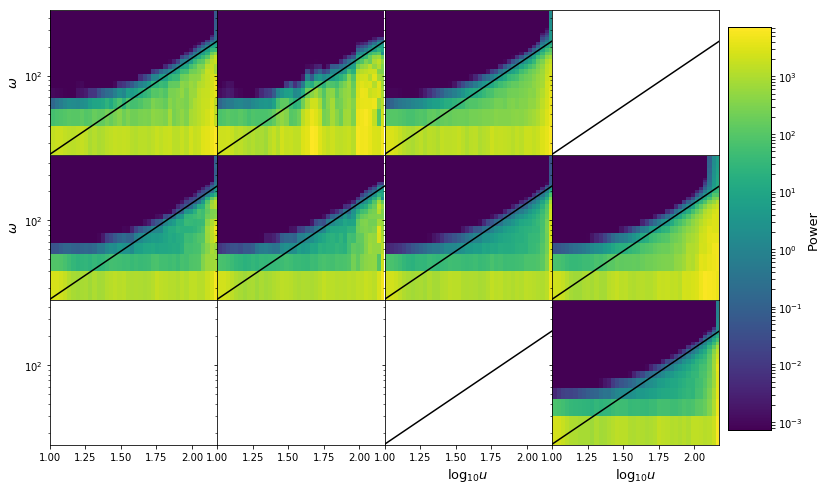

In [11]:
fig, ax = plt.subplots(
    3, 4, figsize=(12,8), sharex=True, sharey=True, 
    gridspec_kw={"hspace":0, "wspace":0}
)


power = []
with h5py.File(filename_template.format(kind="spokes",log="lin",n_ant=256, nspokes=3), 'r') as f:
    omega = f['omega'][...]
    power += [np.mean(f['power'][...], axis=0)]
    u = f['u'][...]
    
with h5py.File(filename_template.format(kind="spokes",log="lin",n_ant=1000, nspokes=3), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
with h5py.File(filename_template.format(kind="spokes",log="log",n_ant=256, nspokes=4), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
with h5py.File(filename_template.format(kind="spokes",log="log",n_ant=1000, nspokes=4), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]

with h5py.File(filename_template2.format(kind="filled_circle",shape="0.0", n_ant=256), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
with h5py.File(filename_template2.format(kind="filled_circle",shape="0.0",n_ant=1000), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]

with h5py.File(filename_template2.format(kind="filled_circle",shape="0.0",n_ant=10000), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]

with h5py.File(filename_template2.format(kind="filled_circle",shape="1.0", n_ant=256), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
with h5py.File(filename_template2.format(kind="filled_circle",shape="1.0",n_ant=1000), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]

with h5py.File(filename_template2.format(kind="filled_circle",shape="1.0",n_ant=10000), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
power = np.array(power)
vmax = np.max(power)
vmin = vmax/1e7 #np.min(power[power>0])

kw = dict(omega_is_logscale=False, lognorm=True, horizon_line=1, vmin=vmin, vmax=vmax)

plot_power(power[0].T, u, omega, fig=fig, ax=ax[0,0], xlabel=False, **kw)
plot_power(power[1].T, u, omega, fig=fig, ax=ax[1,0], xlabel=False, **kw)
plot_power(power[2].T, u, omega, fig=fig, ax=ax[0,1], xlabel=False, ylabel=False, **kw)    
plot_power(power[3].T, u, omega, fig=fig, ax=ax[1,1], xlabel=False, ylabel=False, **kw);
plot_power(power[4].T, u, omega, fig=fig, ax=ax[0,2], xlabel=False, ylabel=False, **kw)    
plot_power(power[5].T, u, omega, fig=fig, ax=ax[1,2], xlabel=False, ylabel=False, **kw);
plot_power(power[6].T, u, omega, fig=fig, ax=ax[2,2], xlabel=True, ylabel=False, **kw);
plot_power(power[6].T, u, omega, fig=fig, ax=ax[0,3], xlabel=False, ylabel=False, **kw)    
plot_power(power[7].T, u, omega, fig=fig, ax=ax[1,3], xlabel=False, ylabel=False, **kw);
plot_power(power[8].T, u, omega, fig=fig, ax=ax[2,3], xlabel=True, ylabel=False, **kw);

